In [4]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [12]:
data.shape

(1000, 5)

In [14]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [16]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [20]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [22]:
data.isnull().sum().sum()

0

In [24]:
data.duplicated().sum()

0

In [26]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
        'energy_consumption'],
       dtype='object')]

In [28]:
data.attrs

{}

In [30]:
X = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y = data['energy_consumption']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #input layer with 64 neuron
    Dense(32, activation='relu'), #hidden layer with 32 neuron
    Dense(1) #output layer for regression (1 neuron)
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#mean squared  errror and mean absolute error

In [51]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 87522.4609 - mae: 266.1790 - val_loss: 83548.8828 - val_mae: 258.7206
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90883.4922 - mae: 272.2044 - val_loss: 82882.9141 - val_mae: 257.4208
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 87138.6875 - mae: 265.6737 - val_loss: 81788.7891 - val_mae: 255.2714
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84255.6484 - mae: 261.6671 - val_loss: 80052.0391 - val_mae: 251.8089
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89816.1953 - mae: 270.3450 - val_loss: 77417.3984 - val_mae: 246.4598
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83507.2266 - mae: 258.5757 - val_loss: 73741.9219 - val_mae: 238.7995
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 76940.3203 - mae: 246.6721 - val_loss: 68924.9844 - val_mae: 228.3493
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72080.1094 - mae: 238.2890 - val_loss:

In [53]:
test_loss, test_mae = model.evaluate (X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18156.2734 - mae: 115.4105  
Test Mean Absolute Error: 115.75


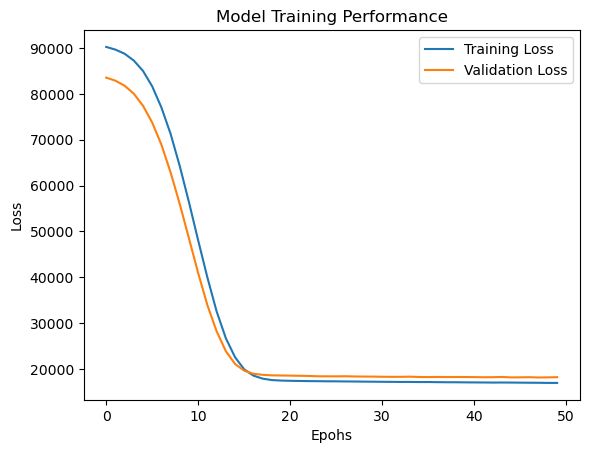

In [57]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history ['val_loss'], label='Validation Loss')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [61]:
predictions=model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[292.67892],
       [252.94487],
       [260.75702],
       [209.20749],
       [341.05896],
       [312.88828],
       [318.93433],
       [296.94223],
       [294.0765 ],
       [279.4365 ],
       [234.8563 ],
       [263.7996 ],
       [291.28583],
       [231.82104],
       [301.94495],
       [320.23746],
       [264.112  ],
       [314.1543 ],
       [298.8998 ],
       [245.52396],
       [276.23572],
       [291.80038],
       [274.08713],
       [281.46323],
       [255.0042 ],
       [244.91893],
       [257.8678 ],
       [319.48587],
       [320.12314],
       [274.2507 ],
       [236.78578],
       [305.61432],
       [285.47107],
       [271.19638],
       [323.68616],
       [289.4905 ],
       [215.35037],
       [259.07855],
       [269.44388],
       [240.5511 ],
       [254.89311],
       [253.15009],
       [250.97748],
       [257.3632 ],
       [267.02658],
       [255.00479],
       [270.54166],
       [259.3151 ],
       [300.39175],
       [297.80515],


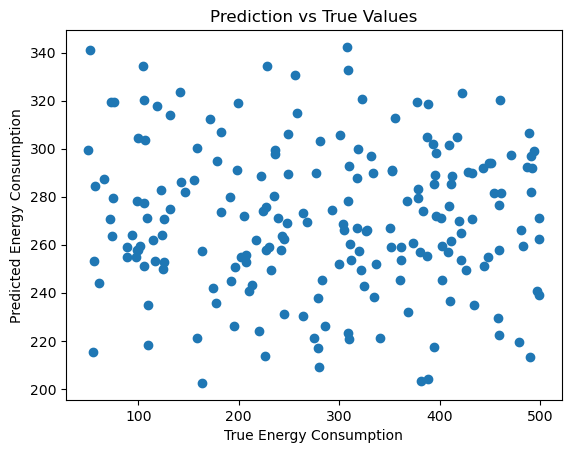

In [65]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Prediction vs True Values')
plt.show()